🔹 Introduction

In this project, I performed data cleaning and exploratory data analysis (EDA) on a data science jobmarket dataset. I am going to analyse the job listings and investigate what skills are most demanding in data science field.Techniques included handling missing values, incosistencies data issues and visualizing data trends and patterns in job roles, salaries and required skills.
Tools
- Python
- Pandas
- Regrex
- WordCloud
- Matplotlib/Seaborn

In [25]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 2.9 MB/s eta 0:00:00 0:00:01


In [26]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
#Load and Inspect Dataset
df = pd.read_csv("./data/data_science_job.csv")
df.head()
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [29]:
#Fill Missing Values
df['job_category'].fillna('Unknown', inplace=True)
df['salary_currency'].fillna('Unknown', inplace=True)
df['experience_level'].fillna('Unknown', inplace=True)
df['company_size'].fillna('Unknown', inplace=True)


In [31]:
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine learning engineer,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,statistician,ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,machine learning engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,data analyst,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,machine learning engineer,Unknown,Unknown,179769,179111,UK,Unknown,CT,In-person,IN,Unknown
4996,2021,machine learning engineer,Unknown,Unknown,184642,196373,CN,Unknown,FL,Remote,UK,Unknown
4997,2022,machine learning engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [5]:
#Clean job_title column by removing extra text like "in office", "(Remote)"
df['job_title'] = df['job_title'].str.lower().str.replace(r'\(.*\)', '', regex=True)
df['job_title'] = df['job_title'].str.replace('in office', '', regex=False).str.strip()


🔹 Analyze Job title Frequencies

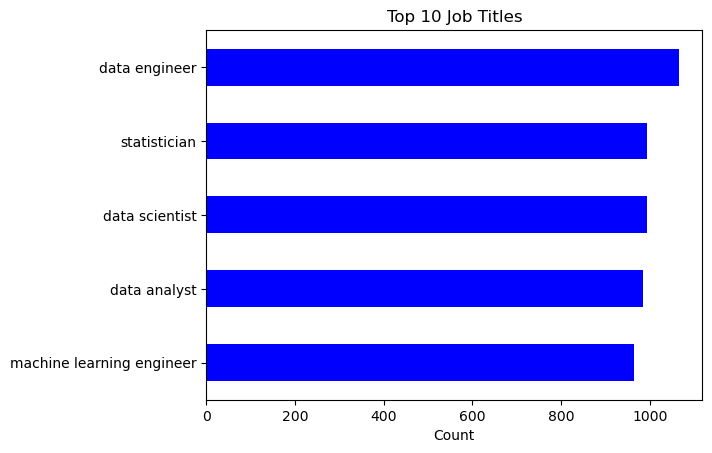

In [45]:
top_jobs = df['job_title'].value_counts().head(10)
top_jobs.plot(kind='barh', color='blue')
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

🔹 Analyze Work Settings and Locations

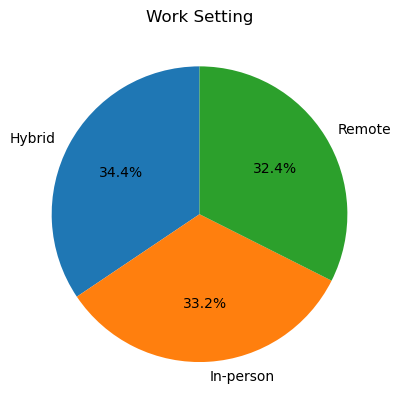

In [21]:
work_setting = df["work_setting"].value_counts().head(10)
work_setting.plot(kind='pie', autopct="%1.1f%%", startangle=90)
plt.title("Work Setting")
plt.ylabel("")
plt.show()


🔹 WordCloud for Job Titles

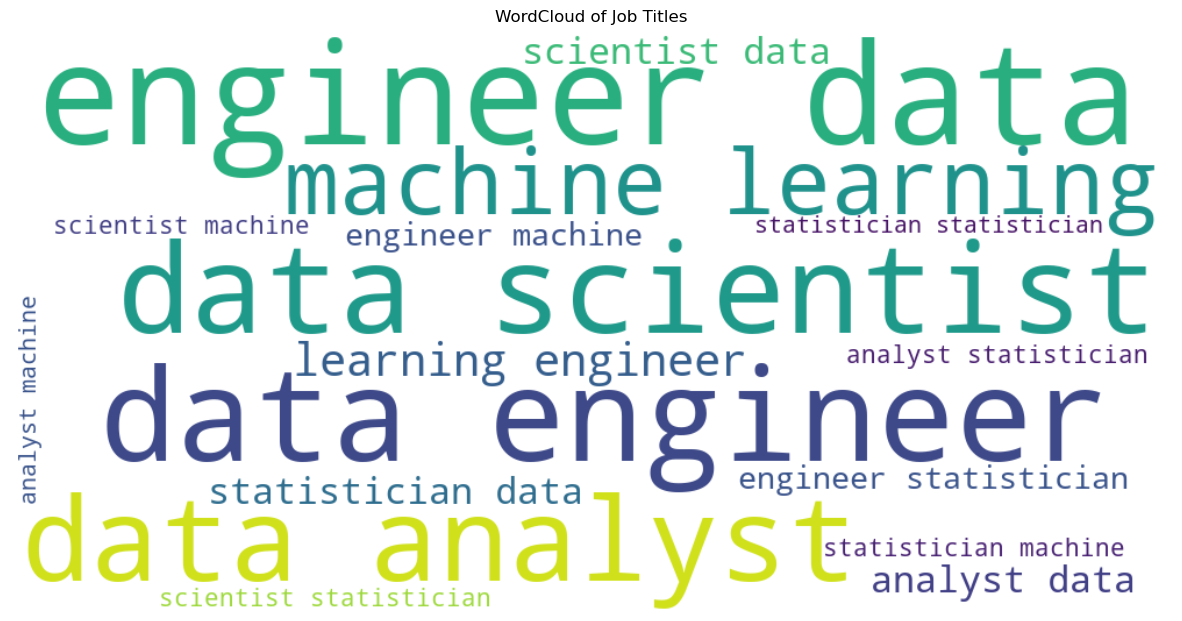

In [27]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(df['job_title']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Job Titles")
plt.show()


🔹Average Salary for Job titles

In [40]:
top_jobs = df['job_title'].value_counts().head(10).index
top_jobs

Index(['data engineer', 'statistician', 'data scientist', 'data analyst',
       'machine learning engineer'],
      dtype='object')

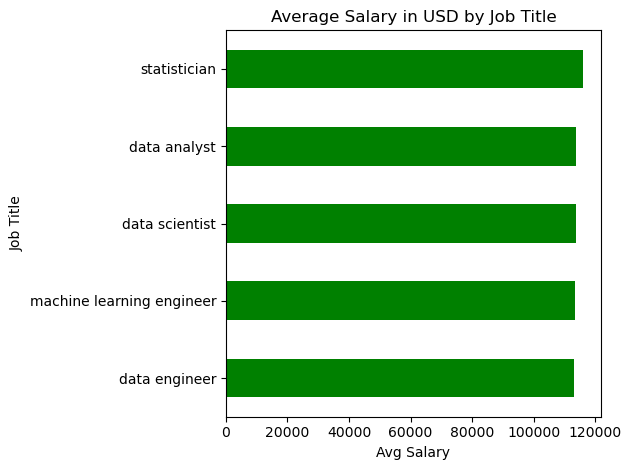

In [44]:
avg_salary = df[df['job_title'].isin(top_jobs)].groupby('job_title')['salary_in_usd'].mean().sort_values()
avg_salary.plot(kind='barh', color='green')
plt.title("Average Salary in USD by Job Title")
plt.xlabel("Avg Salary")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

🔹 Compare Salaries by Country and Work Setting

In [49]:
top_countries = df['employee_residence'].value_counts().head(10).index
top_countries

Index(['JP', 'IN', 'US', 'DE', 'MX', 'CN', 'UK'], dtype='object')

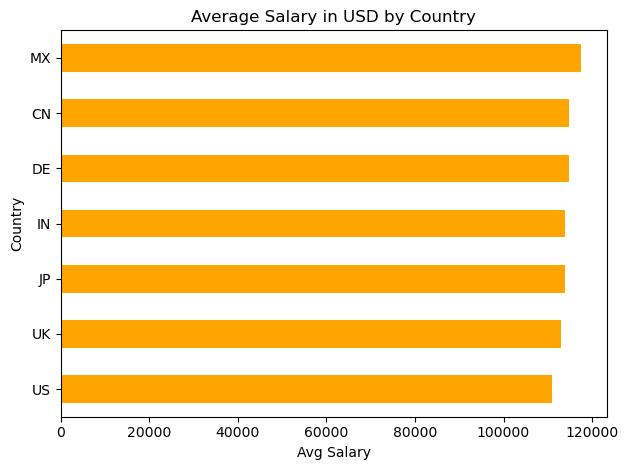

In [51]:
avg_salary = df[df['employee_residence'].isin(top_countries)].groupby('employee_residence')['salary_in_usd'].mean().sort_values()
avg_salary.plot(kind='barh', color='orange')
plt.title("Average Salary in USD by Country")
plt.xlabel("Avg Salary")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

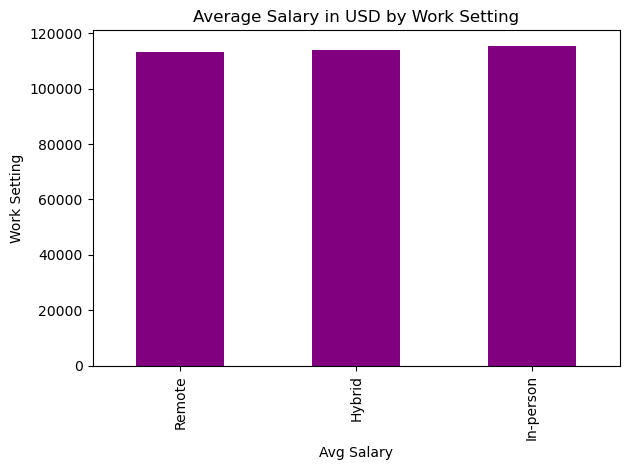

In [52]:
df.groupby('work_setting')['salary_in_usd'].mean().sort_values().plot(kind='bar', color='purple')
plt.title("Average Salary in USD by Work Setting")
plt.xlabel("Avg Salary")
plt.ylabel("Work Setting")
plt.tight_layout()
plt.show()

🔹 Salary Trends over time

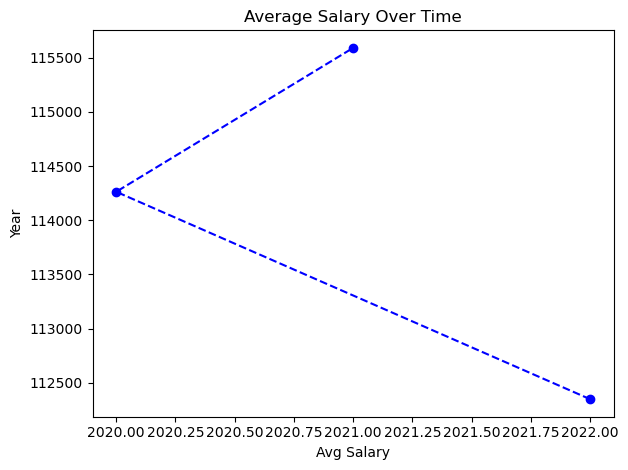

In [55]:
df.groupby('work_year')['salary_in_usd'].mean().sort_values().plot(marker='o', linestyle='--', color='blue')
plt.title("Average Salary Over Time")
plt.xlabel("Avg Salary")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

🔹 Salary Trends over time

In [56]:
top_titles = df['job_title'].value_counts().head(10).index
df_top = df[df['job_title'].isin(top_titles)]

In [60]:
heatmap_data = pd.pivot_table(
    df_top,
    index='job_title',
    columns='experience_level',
    values='salary_in_usd',
    aggfunc='count',
    fill_value=0
)

In [63]:
heatmap_data 

experience_level,EN,EX,MI,SE,Unknown
job_title,,,,,
data analyst,231,213,227,227,86
data engineer,225,250,243,247,100
data scientist,238,223,219,212,101
machine learning engineer,202,214,203,230,115
statistician,219,219,220,238,98


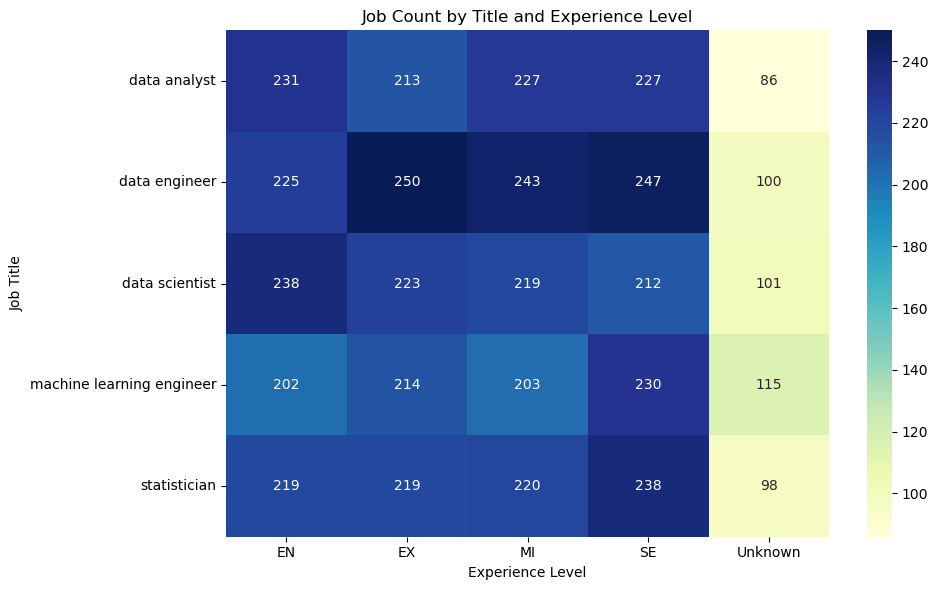

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Job Count by Title and Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()